<a href="https://colab.research.google.com/github/ni-ms/colab-projects/blob/time-series/LSTM_Non_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# make the original data
series = np.sin((0.1 * np.arange(400))**2)

This is a time series of the form x(t) = sin(wt^2)

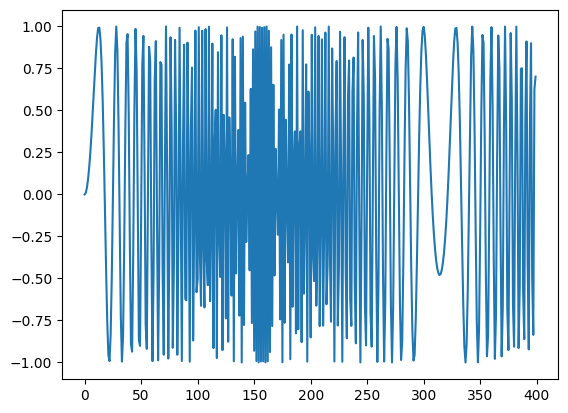

In [ ]:
# Plot it
plt.plot(series)
plt.show()

In [ ]:
# Build the dataset
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T) # To make it N x T
Y = np.array(Y)
N = len(X)
print("X Shape ", X.shape, " Y Shape ", Y.shape)

X Shape  (390, 10)  Y Shape  (390,)


In [ ]:
# Try Autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01)
)

#Train the Rnn
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.2656 - val_loss: 1.7227
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1735 - val_loss: 1.5315
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9567 - val_loss: 1.3563
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9088 - val_loss: 1.2114
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7618 - val_loss: 1.0916
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6968 - val_loss: 0.9749
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6294 - val_loss: 0.8934
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6492 - val_loss: 0.8292
Epoch 9/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5179 - val_loss: 0.7755
Epoch 10/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5185 - val_loss: 0.7311
Epoch 11/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5766 - val_loss: 0.6962
Epoch 12/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4753 - val_loss: 0.6644
Epoch 13/80

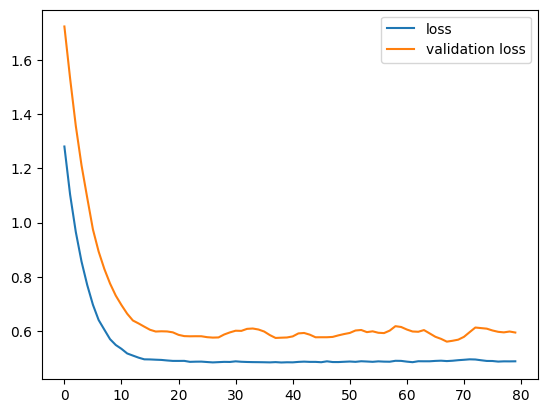

In [ ]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
(390, 1)


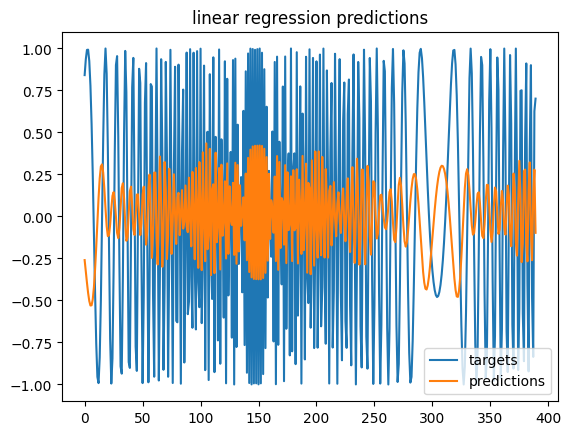

In [ ]:
# One step forecast using true targets
# This fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('linear regression predictions')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

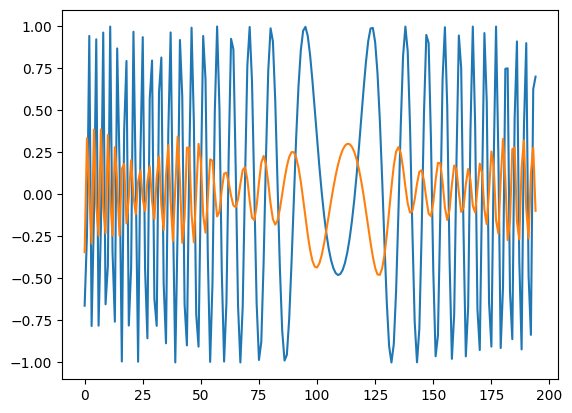

In [ ]:
# One step forecasting, but using the old method instead of the shortcut
validation_target = Y[-N//2:]
validation_predictions = []

# Index of the first validaiton input

i = -N//2

while(len(validation_predictions) < len(validation_target)):
  p = model.predict(X[i].reshape(1,-1))[0,0] # 1x1 array to scalar
  i += 1
  # Update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast targets')
plt.plot(validation_predictions, label=' forecast predictions')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

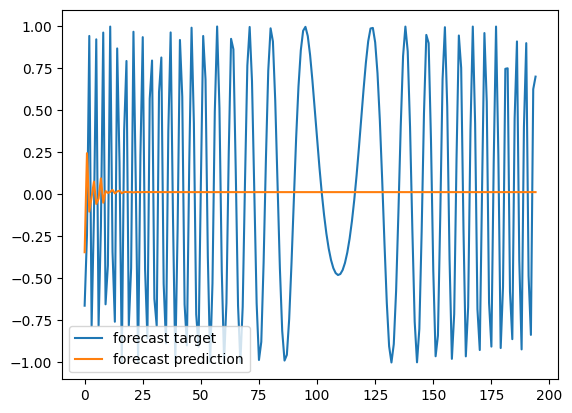

In [ ]:
# Multi step forecast

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] # 1x1 -> Scalar

  # Update the predictions list
  validation_predictions.append(p)

  # make new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p


plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# Now trying with an RNN / LSTM Model

X = X.reshape(-1,T,1) # Make it NxTxD

# Make the RNN
i = Input(shape=(T,D))
x = LSTM(10)(i) # Or LSTM
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.05)
)

# Train the rnn

r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.5350 - val_loss: 0.5401
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4732 - val_loss: 0.5166
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4810 - val_loss: 0.5070
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4434 - val_loss: 0.5585
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3719 - val_loss: 0.5383
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3310 - val_loss: 0.4573
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2296 - val_loss: 0.3403
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2256 - val_loss: 0.2348
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1311 - val_loss: 0.2299
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1136 - val_loss: 0.1928
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1023 - val_loss: 0.1395
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0942 - val_lo

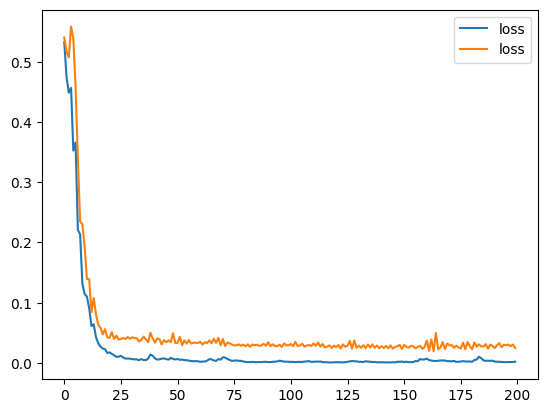

In [ ]:
# Plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='loss')
plt.legend()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
(390, 1)


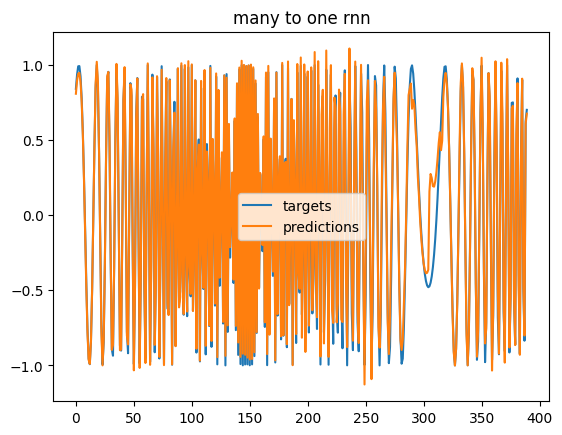

In [ ]:
# One step forecast using true targets

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('many to one rnn')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

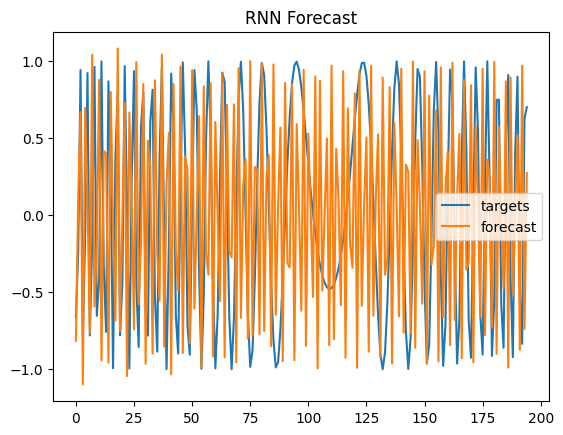

In [ ]:
# Multi step forecasting
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  f = model.predict(input_.reshape(1,T,1))[0,0]
  forecast.append(f)

  input_ = np.roll(input_, -1)
  input_[-1] = f


plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()